In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [29]:
train_data = pd.read_excel("Train.xlsx")
test_data = pd.read_excel("Test.xlsx")
data = pd.concat([train_data, test_data], axis=0)
print(data.columns)

Index(['timestamp', 'Temperature', 'Precipitation', 'Snowfall',
       'Totalcloudiness', 'Highcloudcover', 'Mediumcloudcover',
       'Lowcloudcover', 'Pressure', 'Windspeedm/s', 'WindDirection',
       'WindGusts'],
      dtype='object')


In [30]:
input_parameters = ["timestamp"]
output_parameters = [
    "Temperature",
    "Precipitation",
    "Snowfall",
    "Totalcloudiness",
    "Lowcloudcover",
    "Mediumcloudcover",
    "Highcloudcover",
    "Pressure",
    "Windspeedm/s",
    "WindDirection",
    "WindGusts",
]


In [31]:
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%d.%m.%Y %H:%M:%S")
data.set_index("timestamp", inplace=True)
data.sort_index(inplace=True)


In [32]:
data.fillna(method="ffill", inplace=True)


In [33]:
test_dates = test_data["timestamp"]


In [34]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [35]:
window_size = 24
X = []
y = []
for i in range(len(data) - window_size):
    X.append(scaled_data[i:i + window_size])
    y.append(scaled_data[i + window_size])

X = np.array(X)
y = np.array(y)


In [36]:
train_size = len(train_data)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

In [37]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)


In [38]:
model = LinearRegression()
model.fit(X_train_flattened, y_train)

LinearRegression()

In [44]:
predictions = model.predict(X_test_flattened)
predictions = scaler.inverse_transform(predictions)
output_df = pd.DataFrame(predictions, columns=output_parameters)
output_df["timestamp"] = test_dates.values[-len(output_df):]
output_df.set_index("timestamp", inplace=True)
print(output_df)


                     Temperature  Precipitation  Snowfall  Totalcloudiness  \
timestamp                                                                    
2023-06-02 00:00:00    20.103418       0.101871  0.006291        78.630703   
2023-06-02 01:00:00    19.547866       0.010285  0.002714        47.322703   
2023-06-02 02:00:00    18.592685       0.014465  0.003514        53.632705   
2023-06-02 03:00:00    15.635357       0.023526  0.000807        53.532103   
2023-06-02 04:00:00    13.033133       0.034255  0.003200        38.375644   
...                          ...            ...       ...              ...   
2023-06-30 19:00:00    22.698722       0.013032 -0.004872        45.875363   
2023-06-30 20:00:00    22.345861       0.074179 -0.002540        67.197266   
2023-06-30 21:00:00    21.693822      -0.037357 -0.000426        33.281553   
2023-06-30 22:00:00    20.977570       0.087561 -0.005133        24.316740   
2023-06-30 23:00:00    18.983391       0.076921 -0.002004       

In [46]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, model.predict(X_test_flattened))
r2 = r2_score(y_test, model.predict(X_test_flattened))

print("Mean Absolute Error:", mae)
print("R-squared (R2) Score:", r2)


Mean Absolute Error: 0.2054830926679661
R-squared (R2) Score: -1.9156159045734946e+28


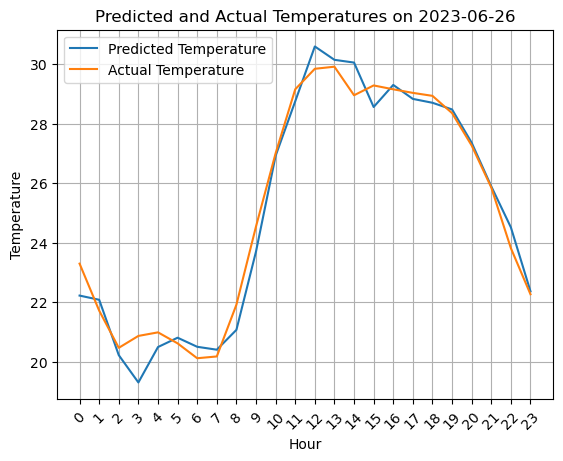

In [53]:
import matplotlib.pyplot as plt

day_to_plot = "2023-06-26"
day_predictions = output_df.loc[day_to_plot, "Temperature"]
day_actual_temperatures = test_data.loc[test_data["timestamp"].dt.date == pd.to_datetime(
    day_to_plot).date(), "Temperature"]

# Plot the predicted and actual temperatures by hours for the specific day
hours = np.arange(0, len(day_predictions))
plt.plot(hours, day_predictions, label="Predicted Temperature")
plt.plot(hours, day_actual_temperatures, label="Actual Temperature")
plt.xlabel("Hour")
plt.ylabel("Temperature")
plt.title(f"Predicted and Actual Temperatures on {day_to_plot}")
plt.legend()
plt.grid(True)
plt.xticks(hours, rotation=45)
plt.show()


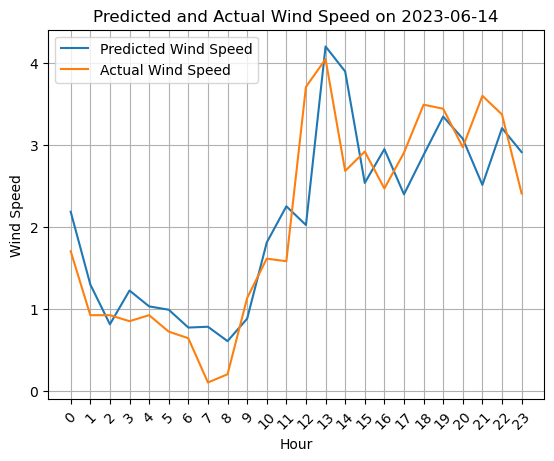

In [60]:
day_to_plot = "2023-06-14"  
day_predictions_wind_speed = output_df.loc[day_to_plot, "Windspeedm/s"]
day_actual_wind_speed = test_data.loc[test_data["timestamp"].dt.date == pd.to_datetime(day_to_plot).date(), "Windspeedm/s"]


hours = np.arange(0, len(day_predictions_wind_speed))
plt.plot(hours, day_predictions_wind_speed, label="Predicted Wind Speed")
plt.plot(hours, day_actual_wind_speed, label="Actual Wind Speed")
plt.xlabel("Hour")
plt.ylabel("Wind Speed")
plt.title(f"Predicted and Actual Wind Speed on {day_to_plot}")
plt.legend()
plt.grid(True)
plt.xticks(hours, rotation=45)
plt.show()
